# Multiple Linear Regression — Theory & Interview Q&A

Multiple Linear Regression extends simple linear regression to model the relationship between two or more independent variables and a continuous dependent variable.

| Aspect                | Details                                                                 |
|-----------------------|------------------------------------------------------------------------|
| **Definition**        | Predicts a continuous target using multiple features via a linear equation.|
| **Equation**          | y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε                                 |
| **Use Cases**         | Real estate pricing, medical risk prediction, marketing analytics       |
| **Assumptions**       | Linearity, independence, homoscedasticity, normality, no multicollinearity|
| **Pros**              | Models complex relationships, interpretable coefficients                |
| **Cons**              | Sensitive to outliers, multicollinearity can distort results            |
| **Key Parameters**    | Coefficients (β₁...βₙ), Intercept (β₀)                                 |
| **Evaluation Metrics**| MSE, RMSE, R² Score                                                     |

## Interview Q&A

**Q1: What is Multiple Linear Regression?**  
A: It predicts a continuous outcome using two or more features.

**Q2: What is multicollinearity?**  
A: When independent variables are highly correlated, making coefficient estimates unreliable.

**Q3: How do you detect multicollinearity?**  
A: Using Variance Inflation Factor (VIF) or correlation matrix.

**Q4: How do you interpret coefficients?**  
A: Each coefficient shows the change in target for a unit change in its feature, holding others constant.

**Q5: What are common ways to improve model performance?**  
A: Feature selection, regularization, removing outliers, transforming variables.

**Q6: What is adjusted R²?**  
A: It adjusts R² for the number of predictors, penalizing unnecessary features.

**Q7: What is the difference between simple and multiple linear regression?**  
A: Simple uses one feature, multiple uses two or more.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()   

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
X = df.drop('target', axis=1)
y = df['target']


In [21]:
X_train , X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)


In [22]:
Pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('lin_reg', LinearRegression())
])


In [23]:
Pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('poly_features', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'


In [24]:
y_pred = Pipeline.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [26]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print("Model coefficients:", Pipeline.named_steps['lin_reg'].coef_)
print("Model intercept:", Pipeline.named_steps['lin_reg'].intercept_)


Mean Squared Error: 49.208961639645345
R^2 Score: -36.056681135660625
Model coefficients: [-1.08961448e-15  8.36904975e-01  1.06111421e-01 -3.64616312e-01
  5.34679093e-01  9.39867318e-02 -2.47137613e+00 -1.17632829e+00
 -1.07096466e+00 -1.42566259e-01  2.16569641e-02  3.98388801e-01
 -2.87628671e-01  1.20211745e-01 -1.95597450e+00 -7.11342374e-01
 -5.96022656e-01  4.28267750e-02 -2.09123791e-02  3.67345471e-02
  6.27820668e-02 -4.82708346e-01 -2.57889987e-01 -2.33127928e-01
  1.55824164e-01 -2.73509471e-01 -2.11946707e-01  1.37794057e+00
  7.82947771e-01  6.46372139e-01  1.18162204e-01  3.72346321e-01
 -3.64046404e-01 -6.07368574e-01 -5.03780399e-01 -3.98928815e-03
  4.78316799e-01 -9.98037607e-03 -3.62205656e-02  1.58547636e-02
  1.19364438e+00  1.32525762e+00  1.30188892e-01  2.10153535e-01
  5.18356035e-02]
Model intercept: 1.9130138547308644


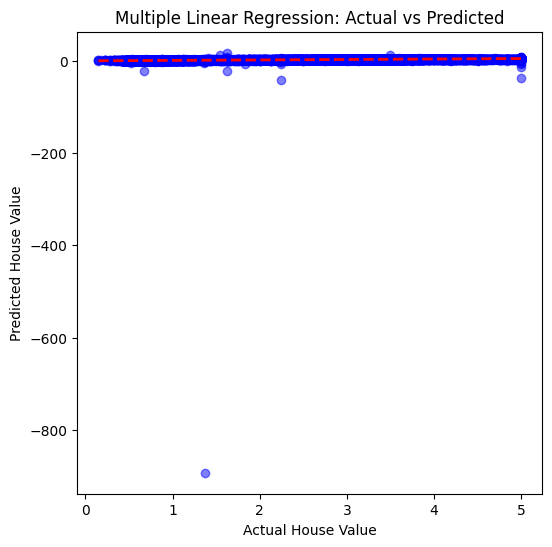

In [27]:
# 7. Visualization (Actual vs Predicted)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.show()

In [30]:
## test with sample data
# Use the mean of each feature as a valid sample
sample_data = np.array([X.mean().values])
predicted_value = Pipeline.predict(sample_data)
print(f"Predicted House Value for sample (feature means): {predicted_value}")

Predicted House Value for sample (feature means): [1.90309323]


c:\Users\Suraj Khodade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Proper Code

Cross-validation results:
Mean Train MSE: 0.4145544146318837
Mean Test MSE: 37.948219334349616
Mean Train R2: 0.6875521146474907
Mean Test R2: -25.129224730024937
Mean Squared Error: 49.208961639645345
R^2 Score: -36.056681135660625
Model coefficients: [-1.08961448e-15  8.36904975e-01  1.06111421e-01 -3.64616312e-01
  5.34679093e-01  9.39867318e-02 -2.47137613e+00 -1.17632829e+00
 -1.07096466e+00 -1.42566259e-01  2.16569641e-02  3.98388801e-01
 -2.87628671e-01  1.20211745e-01 -1.95597450e+00 -7.11342374e-01
 -5.96022656e-01  4.28267750e-02 -2.09123791e-02  3.67345471e-02
  6.27820668e-02 -4.82708346e-01 -2.57889987e-01 -2.33127928e-01
  1.55824164e-01 -2.73509471e-01 -2.11946707e-01  1.37794057e+00
  7.82947771e-01  6.46372139e-01  1.18162204e-01  3.72346321e-01
 -3.64046404e-01 -6.07368574e-01 -5.03780399e-01 -3.98928815e-03
  4.78316799e-01 -9.98037607e-03 -3.62205656e-02  1.58547636e-02
  1.19364438e+00  1.32525762e+00  1.30188892e-01  2.10153535e-01
  5.18356035e-02]
Model intercep

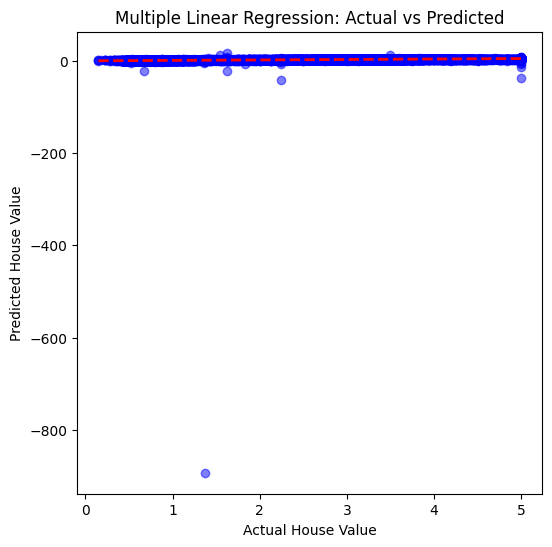

Predicted House Value for sample (feature means): [1.90309323]


c:\Users\Suraj Khodade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# 1. Load data
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 2. Prepare features and target
X = df.drop('target', axis=1)
y = df['target']

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

# 4. Build pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('lin_reg', LinearRegression())
])

# 5. Cross-validation with metrics
scoring = {
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)
}
cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scoring, return_train_score=True)
print("Cross-validation results:")
print("Mean Train MSE:", np.mean(cv_results['train_mse']))
print("Mean Test MSE:", np.mean(cv_results['test_mse']))
print("Mean Train R2:", np.mean(cv_results['train_r2']))
print("Mean Test R2:", np.mean(cv_results['test_r2']))

# 6. Fit pipeline on training data
pipeline.fit(X_train, y_train)

# 7. Predict and evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print("Model coefficients:", pipeline.named_steps['lin_reg'].coef_)
print("Model intercept:", pipeline.named_steps['lin_reg'].intercept_)

# 8. Visualization (Actual vs Predicted)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.show()

# 9. Test with sample data (mean of each feature)
sample_data = np.array([X.mean().values])
predicted_value = pipeline.predict(sample_data)
print(f"Predicted House Value for sample (feature means): {predicted_value}")